In [32]:
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

## Распространенность компетенций в целом

In [33]:
vac_merged = pd.read_csv('vacancies_with_group_themes.csv')
vac_merged.head()

,id,name,area,industry,role,salary_from,salary_to,salary_currency,salary_gross,requirement,...,mean_salary,Когнитивные компетенции,Профессиональные компетенции,Коммуникативные компетенции,Метакомпетентность,Компетенции управления,Общепрофессиональные компетенции,Наличие образования,Мягкие навыки,Опыт на аналогичной должности
0,90904941,Младший аналитик данных,Москва,"Перевозки, логистика, склад, ВЭД","BI-аналитик, аналитик данных",NaN,NaN,NaN,True,"Высшее образование в области анализа данных, м...",...,NaN,1,1,0,0,1,0,0,0,0
1,88824463,Аналитик,Москва,"Перевозки, логистика, склад, ВЭД","BI-аналитик, аналитик данных",NaN,NaN,NaN,True,Высшее образование (техническое/экономическое)...,...,NaN,1,1,0,0,0,1,1,0,0
2,90136465,Аналитик данных,Москва,"Перевозки, логистика, склад, ВЭД","BI-аналитик, аналитик данных",NaN,NaN,NaN,True,Опыт от 2 лет на аналогичной должности. Высшее...,...,NaN,1,1,1,0,1,0,1,1,1
3,90701503,Аналитик данных,Москва,"Перевозки, логистика, склад, ВЭД","BI-аналитик, аналитик данных",NaN,NaN,NaN,True,"Высшее образование в области анализа данных, м...",...,NaN,1,1,0,0,1,0,0,0,0
4,91033422,"Системный аналитик, Маркетплейс, Карточка товара",Москва,"Перевозки, логистика, склад, ВЭД","BI-аналитик, аналитик данных",NaN,NaN,NaN,True,Опыт работы на должности системного аналитика ...,...,NaN,1,1,1,0,1,0,0,0,1


In [34]:
themes_prev = vac_merged.iloc[:, 15:].sum() / vac_merged.shape[0] * 100

In [35]:
themes_prev

Когнитивные компетенции             30.886965
Профессиональные компетенции        89.613854
Коммуникативные компетенции         31.216944
Метакомпетентность                   8.909431
Компетенции управления              45.031594
Общепрофессиональные компетенции    22.901942
Наличие образования                 28.076293
Мягкие навыки                       17.088696
Опыт на аналогичной должности       10.245729
dtype: float64

Text(0.5, 0, 'Распространенность в вакансиях, %')

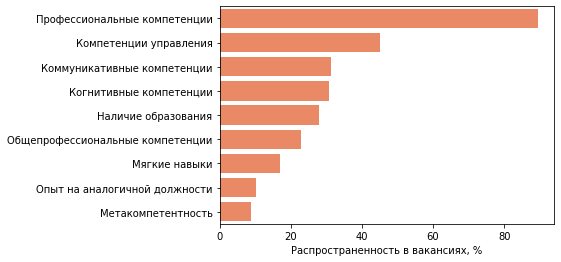

In [36]:
sns.barplot(themes_prev.sort_values(ascending=False).head(10),orient='h', color='coral')
plt.xlabel('Распространенность в вакансиях, %')

В сфере IT в целом удалось выделить девять групп универсальных компетенций, их распространенность в вакансиях представлена на рисунке. Наиболее распространенными оказались профессиональные, которые встречаются в 90% вакансий , также распространенными являются компетенции управления (встречаются в 45% вакансий). Коммуникативные, когнитивные компетенции и наличие образования встречаются примерно в 30% вакансий. Запрос на общепрофессиональные компетенции и мягкие навыки встречается в приблизительно 20% случаев, в то время как опыт на аналогичной должности и метакомпетентность являются наименее распространенными требованиями и присутствуют лишь примерно в 10% вакансий.

## График работы

Проверим сколько вакансий есть для каждой градации графика работы

In [37]:
vac_merged.schedule_.value_counts()

schedule_
Полный день         32314
Удаленная работа     8057
Гибкий график        1426
Сменный график        841
Вахтовый метод         92
Name: count, dtype: int64

Убираем вакансии с вахтовым методом, так как их слишком мало

In [38]:
vac_merged = vac_merged.loc[vac_merged.schedule_ != 'Вахтовый метод']

Сохраняем таблицу с количеством вакансий для каждой из градаций, так как это понадобится нам позже

In [39]:
count_intervals = vac_merged.schedule_.value_counts()
count_intervals

schedule_
Полный день         32314
Удаленная работа     8057
Гибкий график        1426
Сменный график        841
Name: count, dtype: int64

Строим таблицу сопряженности

In [40]:
competency_counts = vac_merged.groupby('schedule_').sum().iloc[:,14:].transpose()
competency_counts

schedule_,Гибкий график,Полный день,Сменный график,Удаленная работа
Когнитивные компетенции,465,10209,231,2269
Профессиональные компетенции,1337,29372,709,6784
Коммуникативные компетенции,410,9631,367,2910
Метакомпетентность,151,2869,95,690
Компетенции управления,604,15098,177,3328
Общепрофессиональные компетенции,296,7947,235,1284
Наличие образования,294,10054,275,1334
Мягкие навыки,188,5868,225,1004
Опыт на аналогичной должности,100,3670,141,445


In [41]:
scipy.stats.chi2_contingency(competency_counts)[1]

6.247140904263143e-232

Обнаружены статистически значимые различия, что говорит о том, что график работы действительно влияет на востребованные компетенции

In [42]:
competency_pers = competency_counts.apply(lambda x: x / count_intervals[x.name] * 100, axis=0)
competency_pers

schedule_,Гибкий график,Полный день,Сменный график,Удаленная работа
Когнитивные компетенции,32.608696,31.593118,27.467301,28.161847
Профессиональные компетенции,93.758766,90.895587,84.304400,84.200074
Коммуникативные компетенции,28.751753,29.804419,43.638526,36.117662
Метакомпетентность,10.589060,8.878505,11.296076,8.563982
Компетенции управления,42.356241,46.722783,21.046373,41.305697
Общепрофессиональные компетенции,20.757363,24.593056,27.942925,15.936453
Наличие образования,20.617111,31.113449,32.699168,16.557031
Мягкие навыки,13.183731,18.159312,26.753864,12.461214
Опыт на аналогичной должности,7.012623,11.357306,16.765755,5.523148


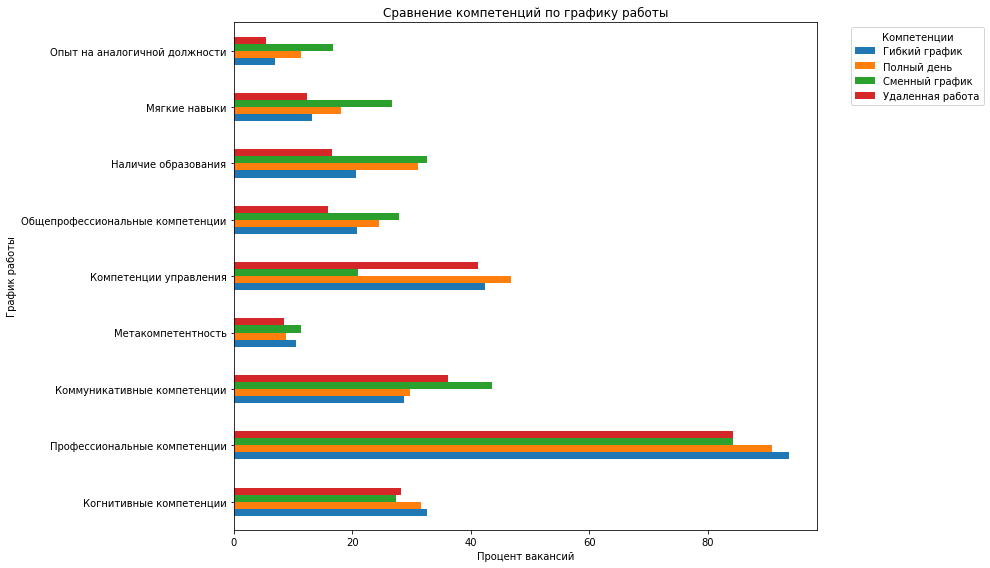

In [43]:
competency_pers.plot(kind='barh', figsize=(14, 8))
plt.title('Сравнение компетенций по графику работы')
plt.xlabel('Процент вакансий')
plt.ylabel('График работы')
plt.legend(title='Компетенции', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Заметно, что больше всего выделяется сменный график работы, что скорее всего связано со спецификой специальностей, для которых существует большая часть вакансий с гибким графиком и это специалисты технической поддержки (их большинство), системные администраторы и сетевые инженеры. Исходя из этого становится понятным, почему наблюдается наиболее низкая потребность в компетенциях управления, но в то же время высокая в коммуникативных навыках, образовании и мягких навыках. Практически во всех вакансиях с гибким графиком присутствуют выделенные востребованные профессиональные компетенции. Это указывает на то, что для трудоустройства на гибкий график работы требуются отличные профессиональные знания. В то же время, это также свидетельствует о том, что работы с гибким графиком доступны для специальностей с наиболее востребованными на рынке компетенциями. Также для гибкого графика важна метакомпетентность, то есть способность самостоятельно обучаться и развиваться, но наиболее низкая потребность в коммуникативных и мягких навыках, что говорит о том, что вакансии с гибким графиком в большей степени подразумевают выполнение узких профессиональных обязанностей с постоянным обновлением знаний и в то же время не требуют от соискателя каких-либо дополнительных мягких навыков. Для удаленной работы в меньшей степени требуется наличие образования, опыт работы и мягкие навыки, что может быть связано как раз с тем, что наличие образования и мягкие навыки наиболее свойственны вакансиям с меньшим опытом работы ( о чем мы поговорим далее), а вакансии с удаленной работой встречаются чаще для людей с опытом. Требования же непосредственно к опыту могут не указываться в теле вакансии, так как на hh.ru есть отдельные раздел с требуемым опытом.

## Занятость

Делаем все то же для типа занятости

In [44]:
vac_merged.employment_.value_counts()

employment_
Полная занятость       41572
Стажировка               486
Частичная занятость      484
Проектная работа          96
Name: count, dtype: int64

In [45]:
vac_merged = vac_merged.loc[vac_merged.employment_ != 'Проектная работа']

In [46]:
emp_counts = vac_merged.employment_.value_counts()
emp_counts

employment_
Полная занятость       41572
Стажировка               486
Частичная занятость      484
Name: count, dtype: int64

In [47]:
competency_counts = vac_merged.groupby('employment_').sum().iloc[:,14:].transpose()
competency_counts

employment_,Полная занятость,Стажировка,Частичная занятость
Когнитивные компетенции,12770,212,161
Профессиональные компетенции,37287,434,389
Коммуникативные компетенции,13019,144,123
Метакомпетентность,3631,106,55
Компетенции управления,18901,168,95
Общепрофессиональные компетенции,9560,116,65
Наличие образования,11544,254,135
Мягкие навыки,7110,84,72
Опыт на аналогичной должности,4317,12,20


In [48]:
scipy.stats.chi2_contingency(competency_counts)[1]

3.3445992143898785e-57

In [49]:
competency_pers = competency_counts.apply(lambda x: x / emp_counts[x.name] * 100, axis=0)
competency_pers

employment_,Полная занятость,Стажировка,Частичная занятость
Когнитивные компетенции,30.717791,43.621399,33.264463
Профессиональные компетенции,89.692582,89.300412,80.371901
Коммуникативные компетенции,31.316752,29.629630,25.413223
Метакомпетентность,8.734244,21.810700,11.363636
Компетенции управления,45.465698,34.567901,19.628099
Общепрофессиональные компетенции,22.996247,23.868313,13.429752
Наличие образования,27.768690,52.263374,27.892562
Мягкие навыки,17.102858,17.283951,14.876033
Опыт на аналогичной должности,10.384393,2.469136,4.132231


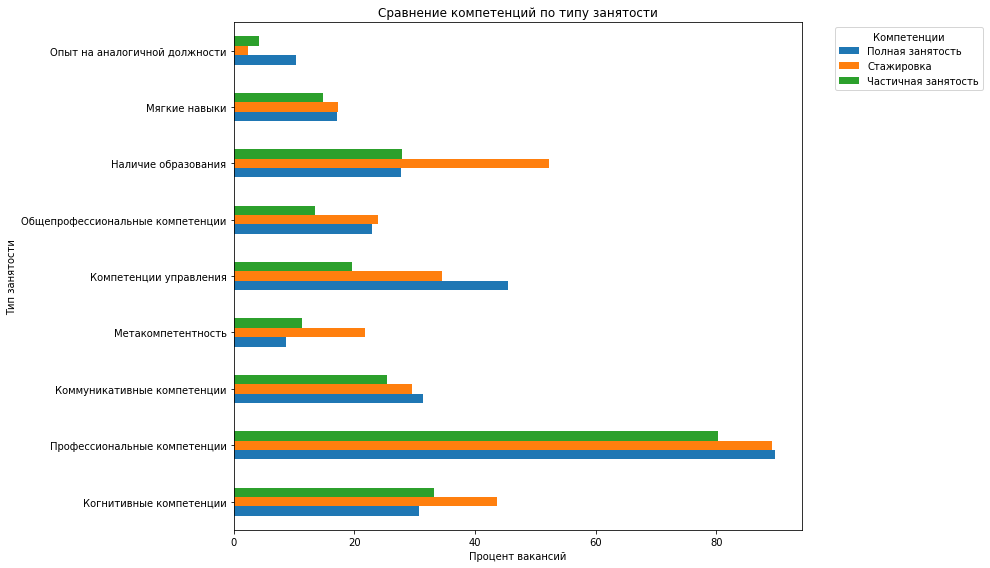

In [50]:
competency_pers.plot(kind='barh', figsize=(14, 8))
plt.title('Сравнение компетенций по типу занятости')
plt.xlabel('Процент вакансий')
plt.ylabel('Тип занятости')
plt.legend(title='Компетенции', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

На рисунке представлена распространенность различных групп компетенций для разных типов занятости. Наибольшие отличия наблюдаются для стажировок, что объясняется их спецификой: стажировки ориентированы на студентов и выпускников вузов. Соответственно, в таких вакансиях в большей степени, чем в других, требуется наличие образования, когнитивные компетенции и способность к обучению, при этом почти отсутствуют требования к опыту работы. В вакансиях для работы на полный день в большей степени востребованы коммуникативные компетенции и управленческие навыки. Это связано с тем, что работа на полный день часто предполагает более сложные задачи, требующие взаимодействия с коллегами и подчиненными, а также управленческие функции. В остальных аспектах серьезных различий между типами занятости не выявлено, что свидетельствует о сходстве базовых требований к компетенциям вне зависимости от формы занятости.

## Зарплата

Здесь предварительно необходимо провести перекрдирование переменной в интервальную. Для того, чтобы определить интервалы сначала посмотрим на описательную статистику

Также, стоит отметить, что будем использовать только вакансии с полной занятостью, чтобы результаты были более точными

In [52]:
description = vac_merged[vac_merged.employment_ == 'Полная занятость'].mean_salary.describe()
description_formatted = description.apply(lambda x: format(x, '.2f'))
description_formatted

count       5557.00
mean      112190.04
std        82156.26
min           90.00
25%        57500.00
50%        86400.00
75%       140000.00
max      1500000.00
Name: mean_salary, dtype: object

Теперь убираем вакансии без указания харплаты и перекодируем интервалы

In [56]:
vac_with_salary = vac_merged.dropna(subset='mean_salary').copy()
vac_with_salary['salary_interval'] = pd.cut(vac_with_salary.mean_salary, 
       bins=[0, 50000, 100000,200000,300000,1500000], 
       labels=["менее 50 тысяч", "от 50 до 100 тысяч", "от 100 до 200 тысяч", "от 200 до 300 тысяч",  "более 300 тысяч"])

In [59]:
count_intervals = vac_with_salary.query("employment_ == 'Полная занятость'").groupby('salary_interval').size()
count_intervals

salary_interval
менее 50 тысяч         1049
от 50 до 100 тысяч     2248
от 100 до 200 тысяч    1611
от 200 до 300 тысяч     514
более 300 тысяч         135
dtype: int64

In [58]:
competency_counts = vac_with_salary.query("employment_ == 'Полная занятость'").groupby('salary_interval').sum().iloc[:,15:].transpose()
competency_counts

salary_interval,менее 50 тысяч,от 50 до 100 тысяч,от 100 до 200 тысяч,от 200 до 300 тысяч,более 300 тысяч
Когнитивные компетенции,329,757,460,152,49
Профессиональные компетенции,687,1867,1456,478,94
Коммуникативные компетенции,502,866,486,141,49
Метакомпетентность,135,272,146,48,10
Компетенции управления,156,651,726,245,88
Общепрофессиональные компетенции,201,509,356,91,14
Наличие образования,315,698,457,129,16
Мягкие навыки,294,584,293,83,16
Опыт на аналогичной должности,103,285,203,42,20


In [60]:
competency_pers = competency_counts.apply(lambda x: x / count_intervals[x.name] * 100, axis=0)
competency_pers

salary_interval,менее 50 тысяч,от 50 до 100 тысяч,от 100 до 200 тысяч,от 200 до 300 тысяч,более 300 тысяч
Когнитивные компетенции,31.363203,33.674377,28.553693,29.571984,36.296296
Профессиональные компетенции,65.490944,83.051601,90.378647,92.996109,69.629630
Коммуникативные компетенции,47.855100,38.523132,30.167598,27.431907,36.296296
Метакомпетентность,12.869399,12.099644,9.062694,9.338521,7.407407
Компетенции управления,14.871306,28.959075,45.065177,47.665370,65.185185
Общепрофессиональные компетенции,19.161106,22.642349,22.098076,17.704280,10.370370
Наличие образования,30.028599,31.049822,28.367474,25.097276,11.851852
Мягкие навыки,28.026692,25.978648,18.187461,16.147860,11.851852
Опыт на аналогичной должности,9.818875,12.677936,12.600869,8.171206,14.814815


In [61]:
scipy.stats.chi2_contingency(competency_counts)[1]

3.707366501308673e-86

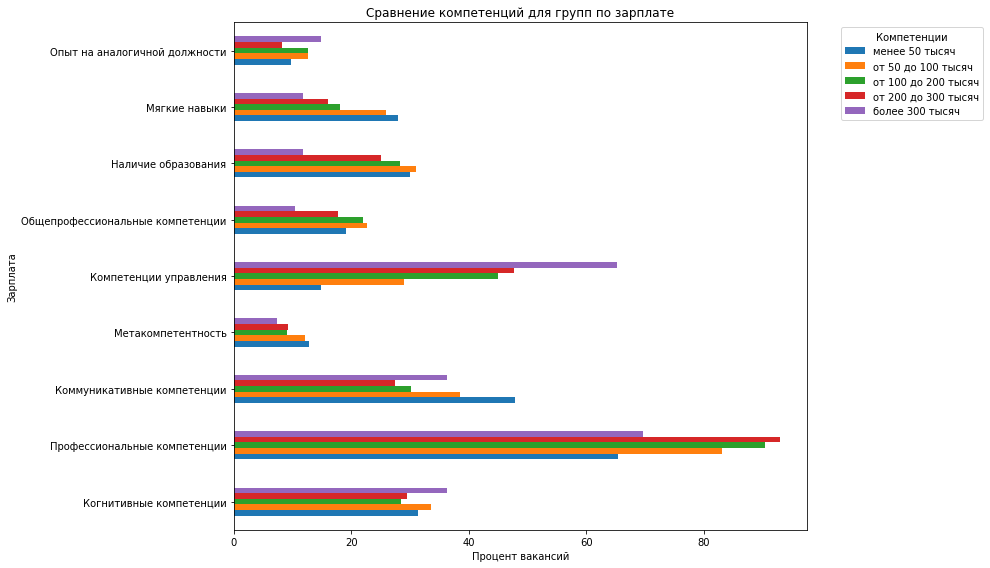

In [62]:
competency_pers.plot(kind='barh', figsize=(14, 8))
plt.title('Сравнение компетенций для групп по зарплате')
plt.xlabel('Процент вакансий')
plt.ylabel('Зарплата')
plt.legend(title='Компетенции', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Заработная плата также влияет на перечень востребованных компетенций. С увеличением заработной платы растет потребность в компетенциях управления, одновременно с этим специалисты с самой высокой заработной платой, по всей видимости, должны обладать менее распространенными уникальными профессиональными компетенциями, так как доля выделенных востребованных компетенций для таких соискателей достаточно низка. С увеличением заработной платы падает потребность в коммуникативных компетенциях (кроме вакансий с самой высокой заработной платой), наличии образования, мягких навыках и метакомпетентности, что говорит о том, что на вакансиях с более низкой зарплатой и скорее всего более низким требуемым опытом работодатели больше склонны ориентироваться именно на непрофессиональные компетенции и отбор здесь происходит по формальному критерию наличия образования, способности обучаться и наличии мягких навыков. Вакансии с высокой заработной платой подразумевают управленческие, когнитивные и уникальные профессиональные навыки.

Размер заработной платы обычно коррелирует с опытом специалистов, поэтому посмотрим на востребованные компетенции в зависимости от опыта и сопоставим их с заработной платой. 

## Опыт работы

In [63]:
exp_counts = vac_merged.experience_.value_counts()
exp_counts

experience_
От 1 года до 3 лет    20023
От 3 до 6 лет         16898
Нет опыта              3668
Более 6 лет            1953
Name: count, dtype: int64

In [64]:
competency_counts = vac_merged.groupby('experience_').sum().iloc[:,14:].transpose()
competency_counts

experience_,Более 6 лет,Нет опыта,От 1 года до 3 лет,От 3 до 6 лет
Когнитивные компетенции,565,1417,6341,4820
Профессиональные компетенции,1836,2689,17736,15849
Коммуникативные компетенции,628,1520,6318,4820
Метакомпетентность,205,544,1714,1329
Компетенции управления,1163,881,8369,8751
Общепрофессиональные компетенции,443,815,4855,3628
Наличие образования,517,1439,5764,4213
Мягкие навыки,257,989,3762,2258
Опыт на аналогичной должности,264,289,2034,1762


In [65]:
scipy.stats.chi2_contingency(competency_counts)[1]

0.0

In [66]:
competency_pers = competency_counts.apply(lambda x: x / exp_counts[x.name] * 100, axis=0)
competency_pers

experience_,Более 6 лет,Нет опыта,От 1 года до 3 лет,От 3 до 6 лет
Когнитивные компетенции,28.929852,38.631407,31.668581,28.524086
Профессиональные компетенции,94.009217,73.309706,88.578135,93.792165
Коммуникативные компетенции,32.155658,41.439477,31.553713,28.524086
Метакомпетентность,10.496672,14.830971,8.560156,7.864836
Компетенции управления,59.549411,24.018539,41.796934,51.787194
Общепрофессиональные компетенции,22.683052,22.219193,24.247116,21.469996
Наличие образования,26.472094,39.231189,28.786895,24.931945
Мягкие навыки,13.159242,26.962923,18.788393,13.362528
Опыт на аналогичной должности,13.517665,7.878953,10.158318,10.427269


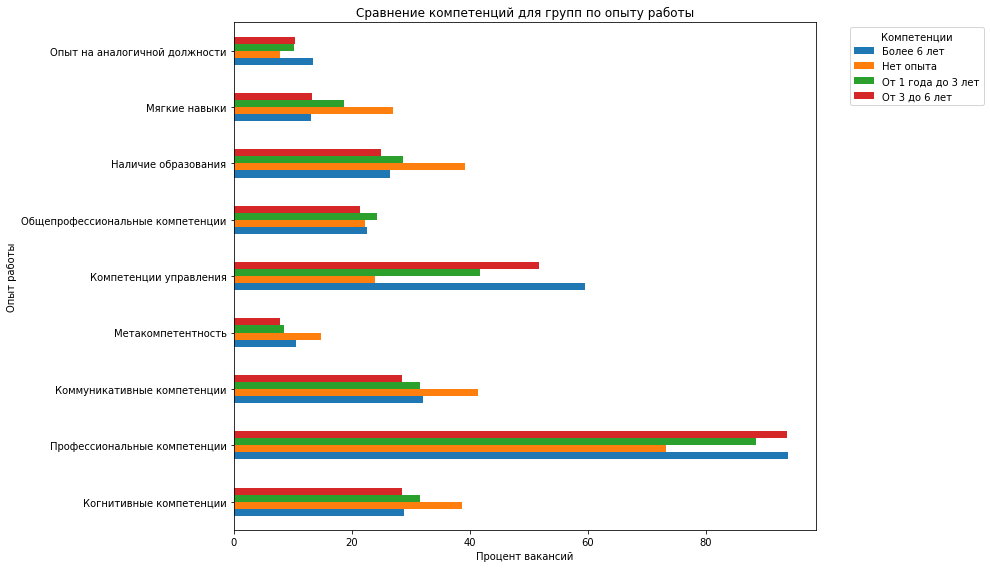

In [68]:
competency_pers.plot(kind='barh', figsize=(14, 8))
plt.title('Сравнение компетенций для групп по опыту работы')
plt.xlabel('Процент вакансий')
plt.ylabel('Опыт работы')
plt.legend(title='Компетенции', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Профессиональные компетенции с ростом опыта не становятся более редкими, Востребованность когнитивных компетенций также падает с увеличением требуемого опыта, что значит, что редкие профессиональные и когнитивные компетенции все же в больший степени связаны именно с высокой заработной платой, нежели с опытом, в остальном закономерности схожи.

## Отрасль компании

Здесь мы используем немного другой датафрейм, который содержит дубликаты вакансий, если еомпания относится сразу к нескольким отраслям

In [74]:
vac_merged = pd.read_csv('for_industries.csv')

Для начала объединим некоторые индустрии, так как их очень много

In [75]:
# Транспорт и логистика
transport_and_logistics = [
    'Перевозки, логистика, склад, ВЭД',
    'Автомобильный бизнес'
]

# Информационные технологии и связь
it_and_communications = [
    'Информационные технологии, системная интеграция, интернет',
    'Телекоммуникации, связь'
]

# Маркетинг и реклама
marketing_and_advertising = [
    'СМИ, маркетинг, реклама, BTL, PR, дизайн, продюсирование'
]

# Строительство и недвижимость
construction_and_real_estate = [
    'Строительство, недвижимость, эксплуатация, проектирование'
]

# Производство
industrial = [
    'Лесная промышленность, деревообработка',
    'Металлургия, металлообработка',
    'Тяжелое машиностроение',
    'Химическое производство, удобрения',
    'Промышленное оборудование, техника, станки и комплектующие',
    'Продукты питания',
    'Сельское хозяйство',
    'Товары народного потребления (непищевые)',
    'Электроника, приборостроение, бытовая техника, компьютеры и оргтехника'
]

# Торговля
commerce = [
    'Розничная торговля'
]

# Финансы и бизнес-услуги
finance_and_business_services = [
    'Финансовый сектор',
    'Услуги для бизнеса',
    'Управление многопрофильными активами'
]

# Образование 
education = [
    'Образовательные учреждения',

]

# Культура 
culture = [
    'Искусство, культура'
]

# Общественная и государственная деятельность
public_and_government = [
    'Государственные организации',
    'Общественная деятельность, партии, благотворительность, НКО',
    'ЖКХ'
]

# Медицина
healthcare_and_services = [
    'Медицина, фармацевтика, аптеки',
]

# Услуги для населения
services = [
    'Услуги для населения',
    'Гостиницы, рестораны, общепит, кейтеринг'
]

# Энергетика и добывающая отрасль
energy_and_extraction = [
    'Добывающая отрасль',
    'Энергетика',
    'Нефть и газ'
]

In [76]:
vac_merged.loc[vac_merged.industry.isin(transport_and_logistics), 'industry'] = 'Транспорт и логистика'
vac_merged.loc[vac_merged.industry.isin(it_and_communications), 'industry'] = 'Информационные технологии и связь'
vac_merged.loc[vac_merged.industry.isin(marketing_and_advertising), 'industry'] = 'Маркетинг и реклама'
vac_merged.loc[vac_merged.industry.isin(construction_and_real_estate), 'industry'] = 'Строительство и недвижимость'
vac_merged.loc[vac_merged.industry.isin(industrial), 'industry'] = 'Промышленность'
vac_merged.loc[vac_merged.industry.isin(commerce), 'industry'] = 'Торговля'
vac_merged.loc[vac_merged.industry.isin(finance_and_business_services), 'industry'] = 'Финансы и бизнес-услуги'
vac_merged.loc[vac_merged.industry.isin(education), 'industry'] = 'Образование'
vac_merged.loc[vac_merged.industry.isin(culture), 'industry'] = 'Культура'
vac_merged.loc[vac_merged.industry.isin(public_and_government), 'industry'] = 'Общественная и государственная деятельность'
vac_merged.loc[vac_merged.industry.isin(healthcare_and_services), 'industry'] = 'Медицина, фармацевтика, аптеки'
vac_merged.loc[vac_merged.industry.isin(services), 'industry'] = 'Услуги для населения'
vac_merged.loc[vac_merged.industry.isin(energy_and_extraction), 'industry'] = 'Энергетика и добывающая отрасль'

In [77]:
ind_count = vac_merged.industry.value_counts()
ind_count

industry
Информационные технологии и связь              23582
Промышленность                                  9557
Финансы и бизнес-услуги                         9118
Торговля                                        4399
Транспорт и логистика                           2664
Энергетика и добывающая отрасль                 2210
Строительство и недвижимость                    2209
Маркетинг и реклама                             1797
Услуги для населения                            1650
Общественная и государственная деятельность      979
Медицина, фармацевтика, аптеки                   973
Образование                                      901
Культура                                          50
Name: count, dtype: int64

In [78]:
vac_merged = vac_merged.loc[-vac_merged.industry.isin(['Культура'])]

In [79]:
cont = vac_merged.groupby('industry').sum().iloc[:,13:].transpose()
cont

industry,Информационные технологии и связь,Маркетинг и реклама,"Медицина, фармацевтика, аптеки",Образование,Общественная и государственная деятельность,Промышленность,Строительство и недвижимость,Торговля,Транспорт и логистика,Услуги для населения,Финансы и бизнес-услуги,Энергетика и добывающая отрасль
Когнитивные компетенции,7343,665,299,291,254,2968,667,1377,704,440,2743,635
Профессиональные компетенции,21190,1671,889,760,809,8516,1977,3653,2039,1119,8259,1992
Коммуникативные компетенции,7569,635,321,272,218,2713,687,1644,1084,837,2849,613
Метакомпетентность,2058,240,82,139,81,872,216,380,191,122,755,167
Компетенции управления,9760,644,413,383,452,4265,1099,1716,1004,498,4630,1149
Общепрофессиональные компетенции,4976,343,248,219,207,2627,557,926,577,255,1958,570
Наличие образования,5380,312,372,391,413,3595,842,1079,711,323,2458,922
Мягкие навыки,3516,390,224,152,187,2058,497,916,464,330,1277,331
Опыт на аналогичной должности,1900,138,137,91,120,1417,379,581,273,170,826,309


In [81]:
scipy.stats.chi2_contingency(cont)[1]

0.0

In [83]:
competency_pers = cont.apply(lambda x: round(x / ind_count[x.name] * 100, 2), axis=0)
competency_pers

industry,Информационные технологии и связь,Маркетинг и реклама,"Медицина, фармацевтика, аптеки",Образование,Общественная и государственная деятельность,Промышленность,Строительство и недвижимость,Торговля,Транспорт и логистика,Услуги для населения,Финансы и бизнес-услуги,Энергетика и добывающая отрасль
Когнитивные компетенции,31.14,37.01,30.73,32.30,25.94,31.06,30.19,31.30,26.43,26.67,30.08,28.73
Профессиональные компетенции,89.86,92.99,91.37,84.35,82.64,89.11,89.50,83.04,76.54,67.82,90.58,90.14
Коммуникативные компетенции,32.10,35.34,32.99,30.19,22.27,28.39,31.10,37.37,40.69,50.73,31.25,27.74
Метакомпетентность,8.73,13.36,8.43,15.43,8.27,9.12,9.78,8.64,7.17,7.39,8.28,7.56
Компетенции управления,41.39,35.84,42.45,42.51,46.17,44.63,49.75,39.01,37.69,30.18,50.78,51.99
Общепрофессиональные компетенции,21.10,19.09,25.49,24.31,21.14,27.49,25.22,21.05,21.66,15.45,21.47,25.79
Наличие образования,22.81,17.36,38.23,43.40,42.19,37.62,38.12,24.53,26.69,19.58,26.96,41.72
Мягкие навыки,14.91,21.70,23.02,16.87,19.10,21.53,22.50,20.82,17.42,20.00,14.01,14.98
Опыт на аналогичной должности,8.06,7.68,14.08,10.10,12.26,14.83,17.16,13.21,10.25,10.30,9.06,13.98


In [84]:
# Создание стиля для тепловой карты
heatmap_style = (
    competency_pers.style
    .set_caption('Навыки по отраслям')  # добавляем подпись
    .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
    .format("{:.2f}")  # форматируем числа с двумя знаками после запятой
)
heatmap_style

industry,Информационные технологии и связь,Маркетинг и реклама,"Медицина, фармацевтика, аптеки",Образование,Общественная и государственная деятельность,Промышленность,Строительство и недвижимость,Торговля,Транспорт и логистика,Услуги для населения,Финансы и бизнес-услуги,Энергетика и добывающая отрасль
Когнитивные компетенции,31.14,37.01,30.73,32.30,25.94,31.06,30.19,31.30,26.43,26.67,30.08,28.73
Профессиональные компетенции,89.86,92.99,91.37,84.35,82.64,89.11,89.50,83.04,76.54,67.82,90.58,90.14
Коммуникативные компетенции,32.10,35.34,32.99,30.19,22.27,28.39,31.10,37.37,40.69,50.73,31.25,27.74
Метакомпетентность,8.73,13.36,8.43,15.43,8.27,9.12,9.78,8.64,7.17,7.39,8.28,7.56
Компетенции управления,41.39,35.84,42.45,42.51,46.17,44.63,49.75,39.01,37.69,30.18,50.78,51.99
Общепрофессиональные компетенции,21.10,19.09,25.49,24.31,21.14,27.49,25.22,21.05,21.66,15.45,21.47,25.79
Наличие образования,22.81,17.36,38.23,43.40,42.19,37.62,38.12,24.53,26.69,19.58,26.96,41.72
Мягкие навыки,14.91,21.70,23.02,16.87,19.10,21.53,22.50,20.82,17.42,20.00,14.01,14.98
Опыт на аналогичной должности,8.06,7.68,14.08,10.10,12.26,14.83,17.16,13.21,10.25,10.30,9.06,13.98


 Профессиональные компетенции востребованы одинаково во всех отраслях. Коммуникативные в большей степени в услугах для населения и транспорте и логистике, в наименьшей степени в общественной и государственной деятельности. Метакомпетентность является наиболее востребованной в образовании и маркетинге и рекламе. Когнитивные компетенции примерно одинаково востребованы во всех отраслях, но немного больше в маркетинге и рекламе. Компетенции управления равномерно востребованы почти во всех сферах, небольшие отклонения в меньшую сторону в услугах для населения, как и общепрофессиональные компетенции. Наличие образования востребовано в большей степени непосредственно в сфере образования, общественной и государственной деятельности, энергетике и добывающей отрасли, то есть в отраслях, так или иначе связанных с государством, что связано с применением государственных стандартов, требующих наличия образования для трудоустройства на ту или иную должность. В меньшей степени образование требуется в маркетинге и рекламе. Мягкие навыки встречаются реже всего в вакансиях в отрасли информационных технологий и связи (профильной для сферы IT), в финансовых и бизнес-услугах, в добывающей отрасли и энергетике, в остальных представлены примерно равномерно. Опыт на аналогичной должности также в большей степени востребован в отраслях, связанных с государством.

## Регион

In [85]:
vac_merged.area.value_counts().head(15)

area
Москва                     27203
Санкт-Петербург             7167
Свердловская область        1987
Новосибирская область       1904
Республика Татарстан        1629
Краснодарский край          1478
Нижегородская область       1456
Московская область          1326
Самарская область           1058
Ростовская область           886
Воронежская область          867
Челябинская область          768
Республика Башкортостан      697
Пермский край                680
Красноярский край            578
Name: count, dtype: int64

Так как Москва и Санкт-Петербург имеют слишком большой отрыв от остальных городов по количеству вакансий, будем рассматривать их в сравнении со всеми остальными регионами вместе.

In [86]:
vac_merged.loc[-vac_merged.area.isin(["Москва", "Санкт-Петербург"]), 'area'] = 'Другие'
area_count = vac_merged.area.value_counts()
area_count 

area
Москва             27203
Другие             25669
Санкт-Петербург     7167
Name: count, dtype: int64

In [87]:
cont = vac_merged.groupby('area').sum().iloc[:,14:].transpose()
cont

area,Другие,Москва,Санкт-Петербург
Профессиональные компетенции,20826,25449,6599
Коммуникативные компетенции,8678,8626,2138
Метакомпетентность,2116,2575,612
Компетенции управления,8947,13934,3132
Общепрофессиональные компетенции,5026,6676,1761
Наличие образования,7852,7041,1905
Мягкие навыки,4807,4303,1232
Опыт на аналогичной должности,2850,2802,689


In [88]:
scipy.stats.chi2_contingency(cont)[1]

1.1692222177041301e-240

In [89]:
competency_pers = cont.apply(lambda x: x / area_count[x.name] * 100, axis=0)
competency_pers

area,Другие,Москва,Санкт-Петербург
Профессиональные компетенции,81.132884,93.552182,92.074787
Коммуникативные компетенции,33.807316,31.709738,29.831171
Метакомпетентность,8.243406,9.465868,8.539138
Компетенции управления,34.855273,51.222292,43.700293
Общепрофессиональные компетенции,19.580038,24.541411,24.570950
Наличие образования,30.589427,25.883175,26.580159
Мягкие навыки,18.726869,15.818108,17.189898
Опыт на аналогичной должности,11.102887,10.300335,9.613506


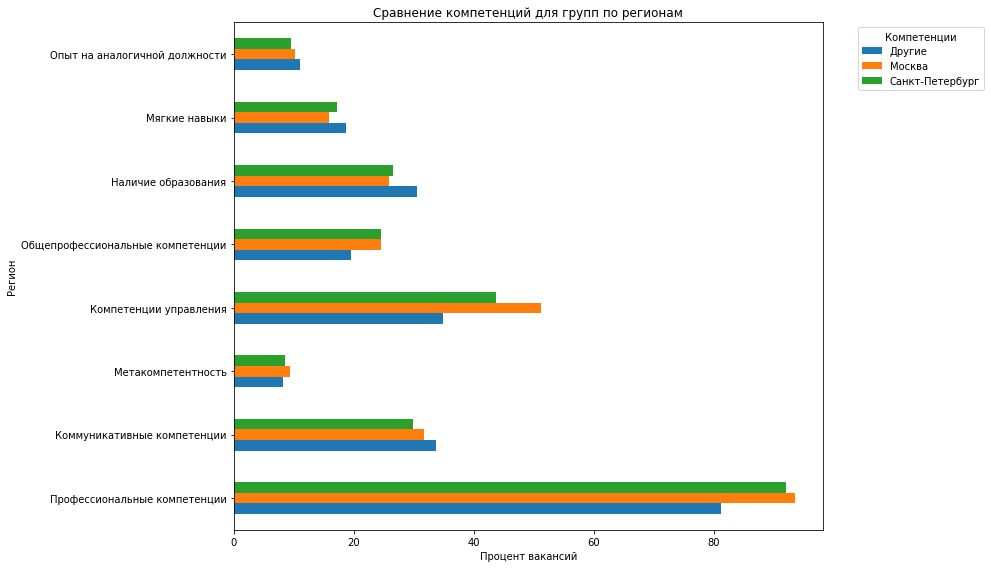

In [90]:
competency_pers.plot(kind='barh', figsize=(14, 8))
plt.title('Сравнение компетенций для групп по регионам')
plt.xlabel('Процент вакансий')
plt.ylabel('Регион')
plt.legend(title='Компетенции', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Сравнение востребованных компетенций в Москве, Санкт-Петербурге и остальных регионах представлено на рисунке 10. В регионах больше, чем в столицах востребованы наличие образования и мягкие навыки, а в меньшей компетенции управления, что может быть связано с распространением в регионах рабочих мест с более низкой квалификацией, чем в Москве и Санкт-Петербурге.

Таким образом, картину востребованных компетенций на рынке IT-специалистов в целом можно обобщить в следующих утверждениях:

•	Ассоциация высокой заработной платы с менее распространёнными профессиональными навыками отражает особенности функционирования современного рынка труда, которые соотносятся с концепцией когнитивного капитализма. Эта концепция подразумевает, что в экономике ценность создаётся не столько трудом и капиталом, сколько знаниями, информацией и интеллектуальным потенциалом. На рынке IT это проявляется в том, что для выполнения высокооплачиваемых работ часто требуются специфические, узкоспециализированные навыки или глубокие знания в определённой области, которые могут быть редкими или менее распространёнными среди кадрового резерва;

•	Компетенции в области управления играют существенную роль на рынке IT-специалистов несмотря на то, что основной упор делается на профессиональные навыки. Это соответствует концепции гибридного профессионализма, которая предполагает не только владение специфическими техническими знаниями, но и умение эффективно управлять проектами, командами и ресурсами. В современной цифровой экономике, где технологические проекты становятся всё более сложными и масштабными, важность управленческих компетенций только увеличивается. Управленческие навыки помогают организовывать работу команды, планировать и контролировать процессы, управлять рисками и принимать стратегические решения. Особенно интересно то, что с увеличением требуемого опыта и предлагаемой заработной платы востребованность управленческих компетенций также растёт. Это указывает на их ключевую роль в развитии профессиональной карьеры в IT-сфере;

•	Когнитивные компетенции, такие как аналитическое мышление и способность к решению проблем играют ключевую роль на различных этапах карьеры в IT-сфере. На начальных этапах работы, когда специалист только начинает свой профессиональный путь, когнитивные компетенции позволяют быстрее осваивать новые технологии, разбираться в сложных проблемах и находить эффективные решения. Однако это необходимо не только на начальном этапе, но и в дальнейшем развитии карьеры. Специалисты, получающие высокую заработную плату, часто отличаются не только опытом работы, но и уровнем развития своих когнитивных способностей. Они способны быстро адаптироваться к изменяющимся условиям, анализировать сложные ситуации и принимать обоснованные решения;

•	Коммуникативные компетенции играют ключевую роль на различных этапах карьерного пути в IT-сфере. На начальных этапах карьеры, когда специалист только входит в профессию, умение эффективно общаться и передавать информацию является необходимым условием для успешного старта. Коммуникативные навыки помогают установить контакт с коллегами, понять требования проекта, адаптироваться к рабочей среде и справиться с первоначальными вызовами. Однако со временем потребность в коммуникативных компетенциях не исчезает, а скорее изменяется. На более продвинутых этапах карьеры, когда специалист уже накопил опыт и знания, умение эффективно общаться становится ключевым фактором для роста по карьерной лестнице и достижения высоких позиций с самой высокой заработной платой. Позиции с высокой заработной платой и требуемым опытом обычно связаны с руководящими или стратегическими функциями, где важны не только технические знания, но и умение эффективно коммуницировать с различными заинтересованными сторонами, принимать решения и влиять на результаты проектов. Таким образом, обладание коммуникативными компетенциями является как необходимостью для вхождения в профессию, так и для значительного роста по карьерной лестнице в IT-сфере;

•	Требование к наличию образования остаётся актуальным для начинающих специалистов и стажеров на рынке IT-специалистов. Это связано с тем, что в начале карьеры у соискателей часто ещё недостаточно опыта работы, чтобы дать полное представление о своих профессиональных компетенциях. В такой ситуации образование становится важным критерием для оценки потенциальных способностей и знаний кандидата. Более того, требование к наличию образования распространено в большей степени в отраслях экономики, тесно связанных с государственными стандартами или регулированием. В таких областях важно соответствие специалистов определённым стандартам квалификации и образовательным требованиям, что делает образование более значимым фактором при найме персонала;

•	Общепрофессиональные компетенции, такие как знание технического английского языка и владение пакетом MS Office, играют важную, но ограниченную роль на рынке IT-специалистов. Вакансии, которые выделяют эти компетенции, обычно ожидают от кандидатов способность читать и понимать техническую документацию на английском языке, а также уверенное владение офисным пакетом для работы с документами, таблицами и презентациями. Таким образом, хотя общепрофессиональные компетенции не являются основным фокусом вакансий в IT, они остаются важным дополнением к профессиональным навыкам и могут повысить конкурентоспособность кандидата на рынке труда;

•	Мягкие навыки играют значительную роль на начальном этапе карьеры в IT-сфере, однако их востребованность может различаться в зависимости от типа организации и специфики работы. Вакансии часто акцентируют внимание на мягких навыках, таких как ответственность, коммуникабельность, внимательность, самостоятельность и активность. Эти навыки помогают адаптироваться к рабочей среде, эффективно взаимодействовать с коллегами и клиентами, а также справляться с повседневными задачами. Однако в профильных IT организациях, где работа напрямую связана с разработкой программного обеспечения, тестированием или администрированием систем, спрос на мягкие навыки может быть ниже. Это объясняется тем, что в таких организациях ключевым приоритетом являются технические знания и навыки, необходимые для выполнения специфических задач;

•	Опыт на аналогичной должности и метакомпетентность редко встречаются среди требований в вакансиях на рынке IT-специалистов. Низкая распространенность этих компетенций может иметь разные причины. В случае опыта на аналогичной должности, это может быть связано с тем, что многие работодатели предпочитают оценивать кандидатов исходя из их навыков и достижений, а не только из предыдущего опыта работы. Кроме того, многие сайты объявлений о вакансиях могут иметь отдельное поле для указания опыта, поэтому это требование может быть упущено в тексте объявления. Что касается метакомпетентности, её низкая встречаемость может свидетельствовать о том, что многие работодатели не считают эту компетенцию приоритетной при отборе кандидатов. Тем не менее, способность к обучению часто запрашивается у начинающих специалистов, стажеров и в образовательной сфере. В условиях быстрого развития цифровой экономики и постоянных изменений в технологическом ландшафте, способность быстро обучаться и адаптироваться становится все более ценной для успешной карьеры в IT-индустрии.
